<a href="https://colab.research.google.com/github/Toxxi-frank/Deeplearning/blob/main/MNIST_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.layers import Conv2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
# take the dataset out
from keras.utils import to_categorical
# multi-class to evalu accuracy
import numpy as np

In [ ]:
(X_train, y_train), (X_test1, y_test) = mnist.load_data()

In [ ]:
X_train.shape()

TypeError: ignored

In [ ]:
X_train.shape
#60000 anh de training, 28x28, anh grayscale

(60000, 28, 28, 1)

In [ ]:
X_test.shape
# 10000 anh de testing

(10000, 28, 28)

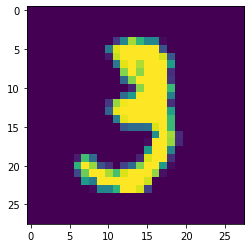

In [ ]:
plt.imshow(X_train[10])
# show anh thu 11 --> number 3

In [ ]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28,1)


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# ban dau y_test la 1 so, sau khi apply lenh tren se ra [14] nhu tren
# y_test[0] = 7, luc sau ra array nhu tren

In [ ]:
model = Sequential()
#create model

In [ ]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
#padding = 'same' de giu nguyen size ban dau

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#add all models

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f34db73b810>>

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs =3)

Epoch 1/3
1875/1875 [==============================] - 89s 47ms/step - loss: 0.7489 - accuracy: 0.8792 - val_loss: 0.0994 - val_accuracy: 0.9691
Epoch 2/3
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.0681 - val_accuracy: 0.9804
Epoch 3/3
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0589 - val_accuracy: 0.9823


In [ ]:
y_hat = model.predict(X_test[0:1])
y_hat
#xac suat cac so du doan

array([[6.8338529e-11, 2.2336166e-10, 1.5948278e-09, 2.4663244e-08,
        6.7304036e-12, 5.1783463e-11, 2.5699623e-16, 9.9999821e-01,
        3.5351702e-09, 1.7387299e-06]], dtype=float32)

In [ ]:
y_label = np.argmax(y_hat, axis =1)
#lay ra gia tri vecto max o tren
y_label

array([7])

In [ ]:
y_test[:1]

array([7], dtype=uint8)

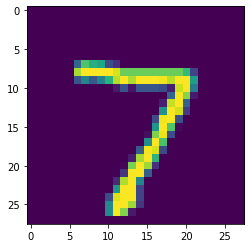

In [ ]:
plt.imshow(X_test1[0])

In [ ]:
y_hat1 = model.predict(X_test[9:10])
y_hat1

array([[1.2187824e-09, 3.3636531e-12, 1.1555448e-10, 2.5506719e-09,
        1.6387723e-05, 5.0364637e-09, 1.8522998e-12, 7.6087798e-07,
        4.5898724e-03, 9.9539292e-01]], dtype=float32)

In [ ]:
y_label1 = np.argmax(y_hat1, axis=1)
y_label1

array([9])

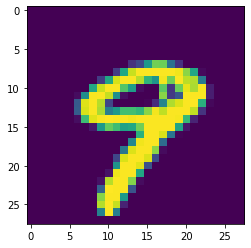

In [ ]:
plt.imshow(X_test1[9])